# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 12.5 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [https://contest.yandex.ru/contest/72492] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим три простых двумерных датасета сделанных с помощью `make_moons`, `make_circles`, `make_classification` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

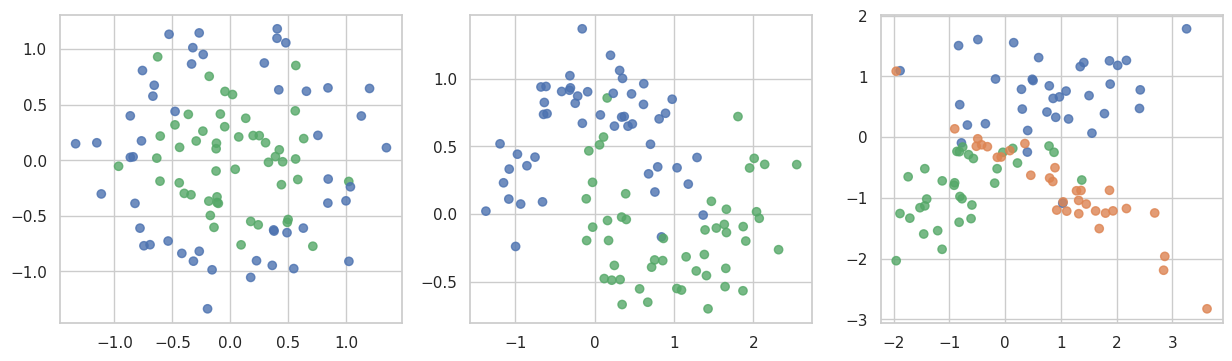

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

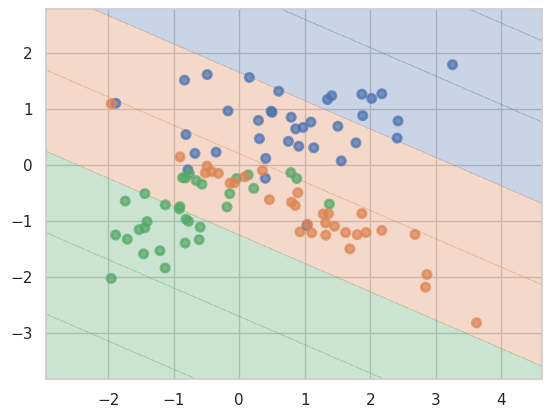

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
decision_tree  = DecisionTreeClassifier().fit(X_train, y_train)

Train accuracy (circles) =  1.0
Test accuracy (circles) =  0.65


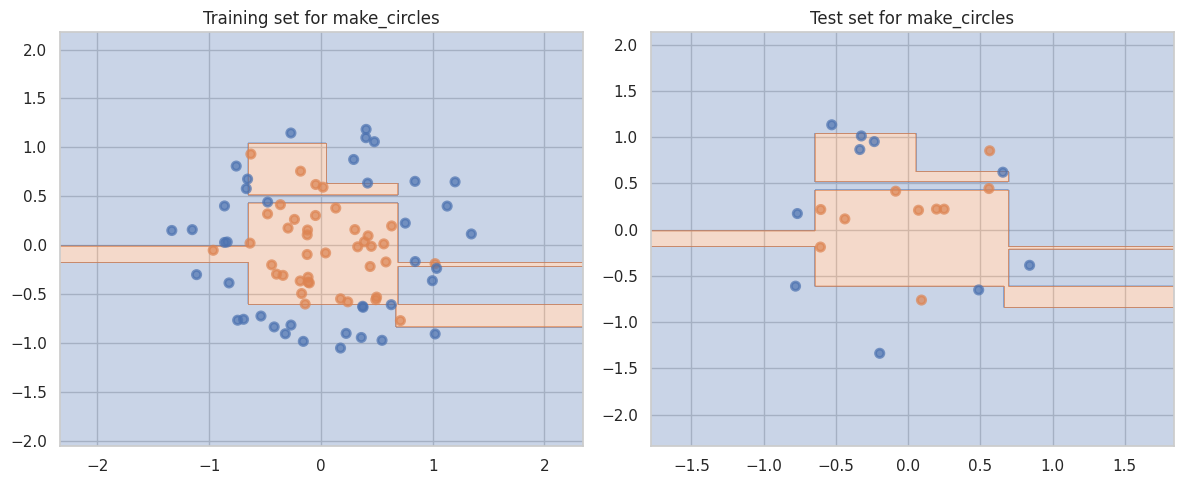

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_surface(decision_tree, X_train, y_train)
plt.title('Training set for make_circles')
train_accuracy = accuracy_score(y_train, decision_tree.predict(X_train))
print('Train accuracy (circles) = ', train_accuracy)

plt.subplot(1, 2, 2)
plot_surface(decision_tree, X_test, y_test)
plt.title('Test set for make_circles')
test_accuracy = accuracy_score(y_test, decision_tree.predict(X_test))
print('Test accuracy (circles) = ', test_accuracy)

plt.tight_layout()
plt.show()

In [9]:
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
decision_tree  = DecisionTreeClassifier().fit(X_train, y_train)

Train accuracy (moons) =  1.0
Test accuracy (moons) =  0.9


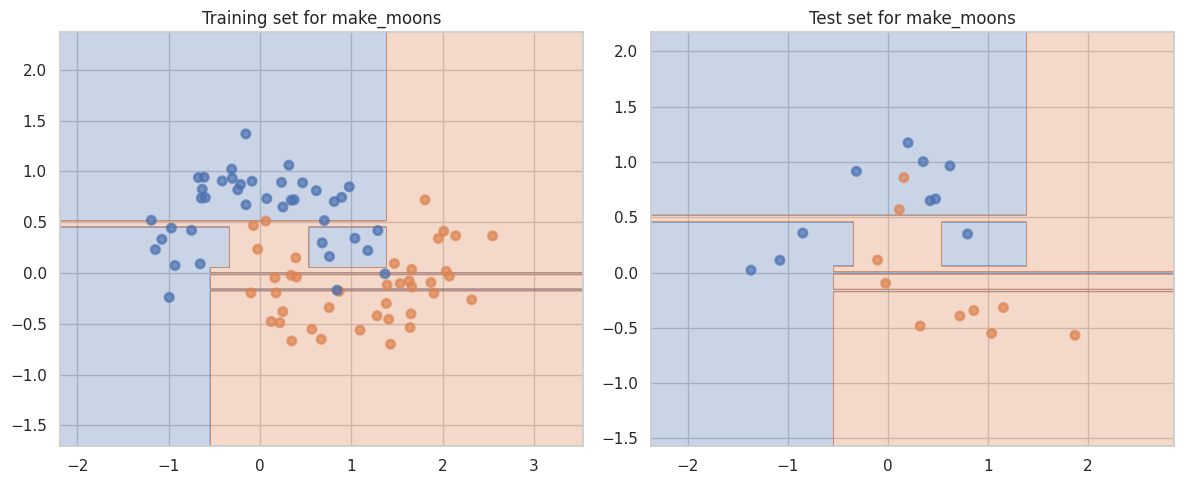

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_surface(decision_tree, X_train, y_train)
plt.title('Training set for make_moons')
train_accuracy = accuracy_score(y_train, decision_tree.predict(X_train))
print('Train accuracy (moons) = ', train_accuracy)

plt.subplot(1, 2, 2)
plot_surface(decision_tree, X_test, y_test)
plt.title('Test set for make_moons')
test_accuracy = accuracy_score(y_test, decision_tree.predict(X_test))
print('Test accuracy (moons) = ', test_accuracy)

plt.tight_layout()
plt.show()

In [11]:
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
decision_tree  = DecisionTreeClassifier().fit(X_train, y_train)

Train accuracy (classification) =  1.0
Test accuracy (classification) =  0.75


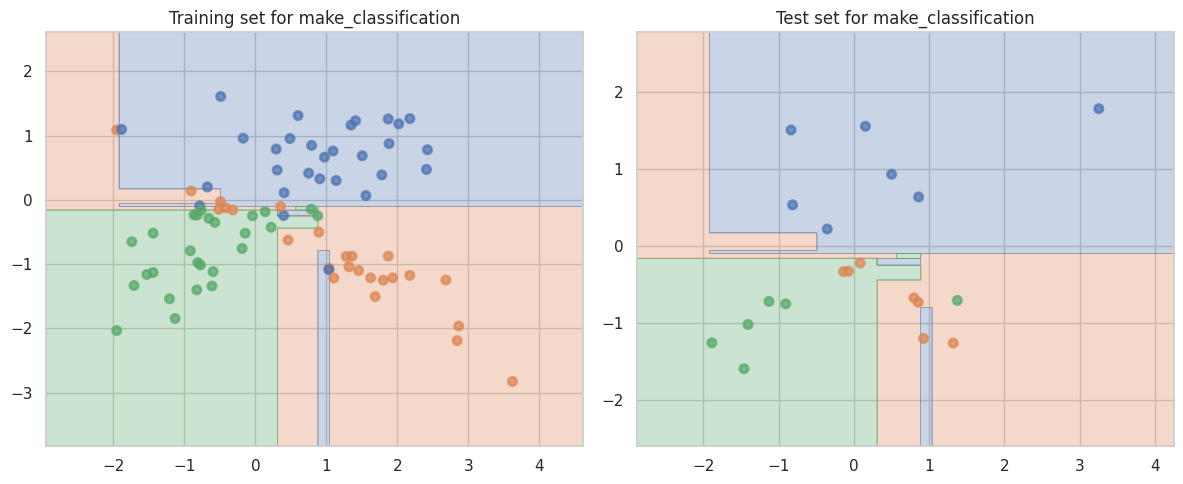

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_surface(decision_tree, X_train, y_train)
plt.title('Training set for make_classification')
train_accuracy = accuracy_score(y_train, decision_tree.predict(X_train))
print('Train accuracy (classification) = ', train_accuracy)

plt.subplot(1, 2, 2)
plot_surface(decision_tree, X_test, y_test)
plt.title('Test set for make_classification')
test_accuracy = accuracy_score(y_test, decision_tree.predict(X_test))
print('Test accuracy (classification) = ', test_accuracy)

plt.tight_layout()
plt.show()

__Ответ:__ Все деревья показали идеальную точность на обучающих данных (1.0), что является признаком того, что модели полностью подстроились под обучающую выборку. Однако на тестовой выборке точность ниже, особенно для Circles. Это говорит о наличии переобучения. Для Moons и Classification переобучение выражено меньше, так как их тестовая точность выше

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки / accuracy. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки.

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

In [13]:
def plot_grid_parameters(X_train, X_test, y_train, y_test, dataset_name):
    plt.figure(figsize=(13, 13))
    plt.suptitle(f'{dataset_name} Dataset', fontsize=16, y=0.98)
    depths = [3, 5, 8, 12]
    min_samples = [20, 10, 3, 1]

    for row, depth in enumerate(depths):
        for col, min_samples_leaf in enumerate(min_samples):
            tree_model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=min_samples_leaf)
            tree_model.fit(X_train, y_train)
            train_acc = round(accuracy_score(y_train, tree_model.predict(X_train)), 4)
            test_acc = round(accuracy_score(y_test, tree_model.predict(X_test)), 4)
            plt.subplot(len(depths), len(min_samples), row * len(min_samples) + col + 1)
            plot_surface(tree_model, X_train, y_train)
            plt.title(
                f"max_depth={depth} | min_samples_leaf={min_samples_leaf}\n"
                f"Train Accuracy: {train_acc}\nTest Accuracy: {test_acc}",
                fontsize=10
            )

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

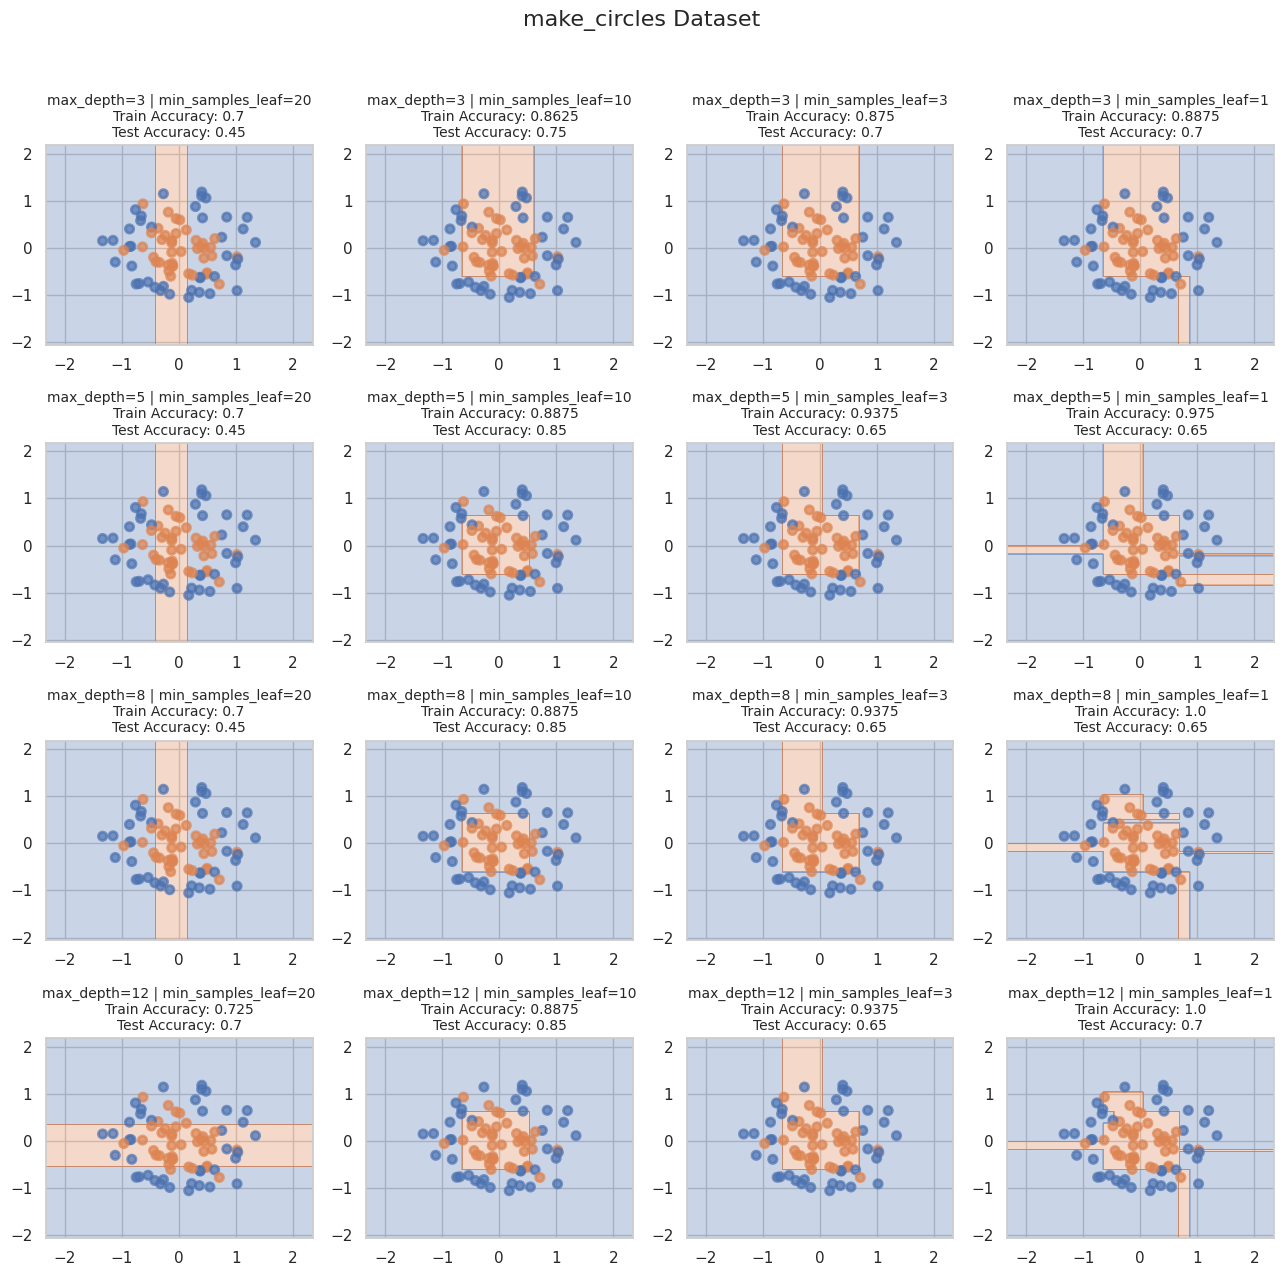

In [14]:
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
plot_grid_parameters(X_train, X_test, y_train, y_test, 'make_circles')

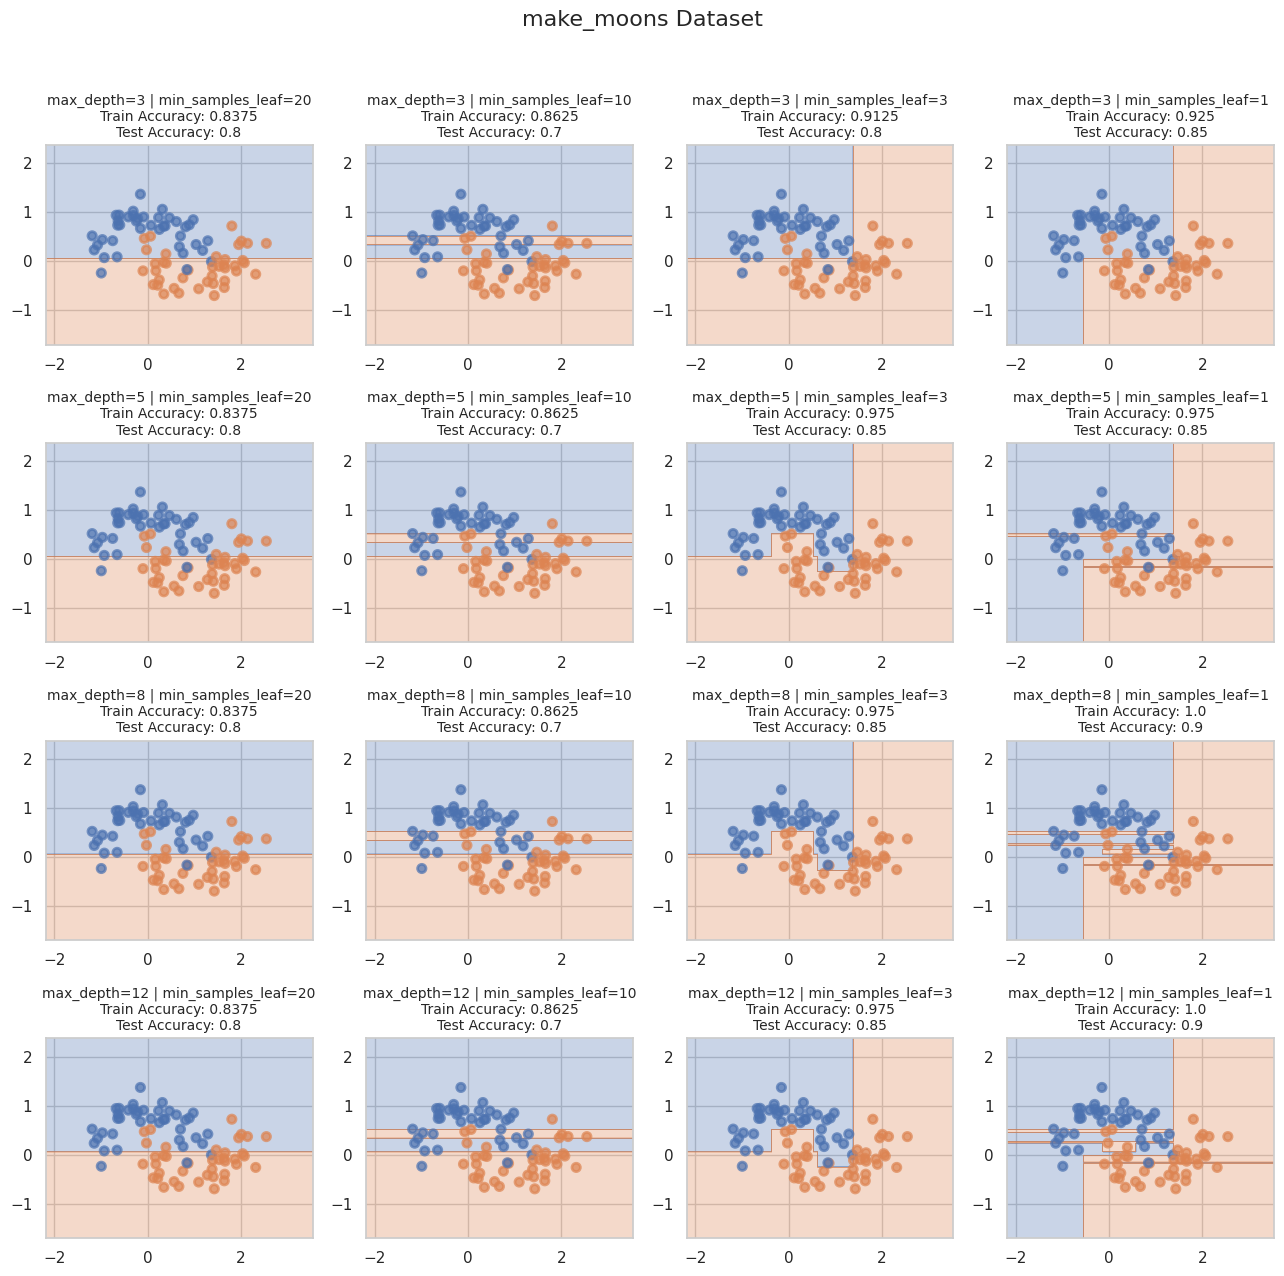

In [15]:
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
plot_grid_parameters(X_train, X_test, y_train, y_test, 'make_moons')

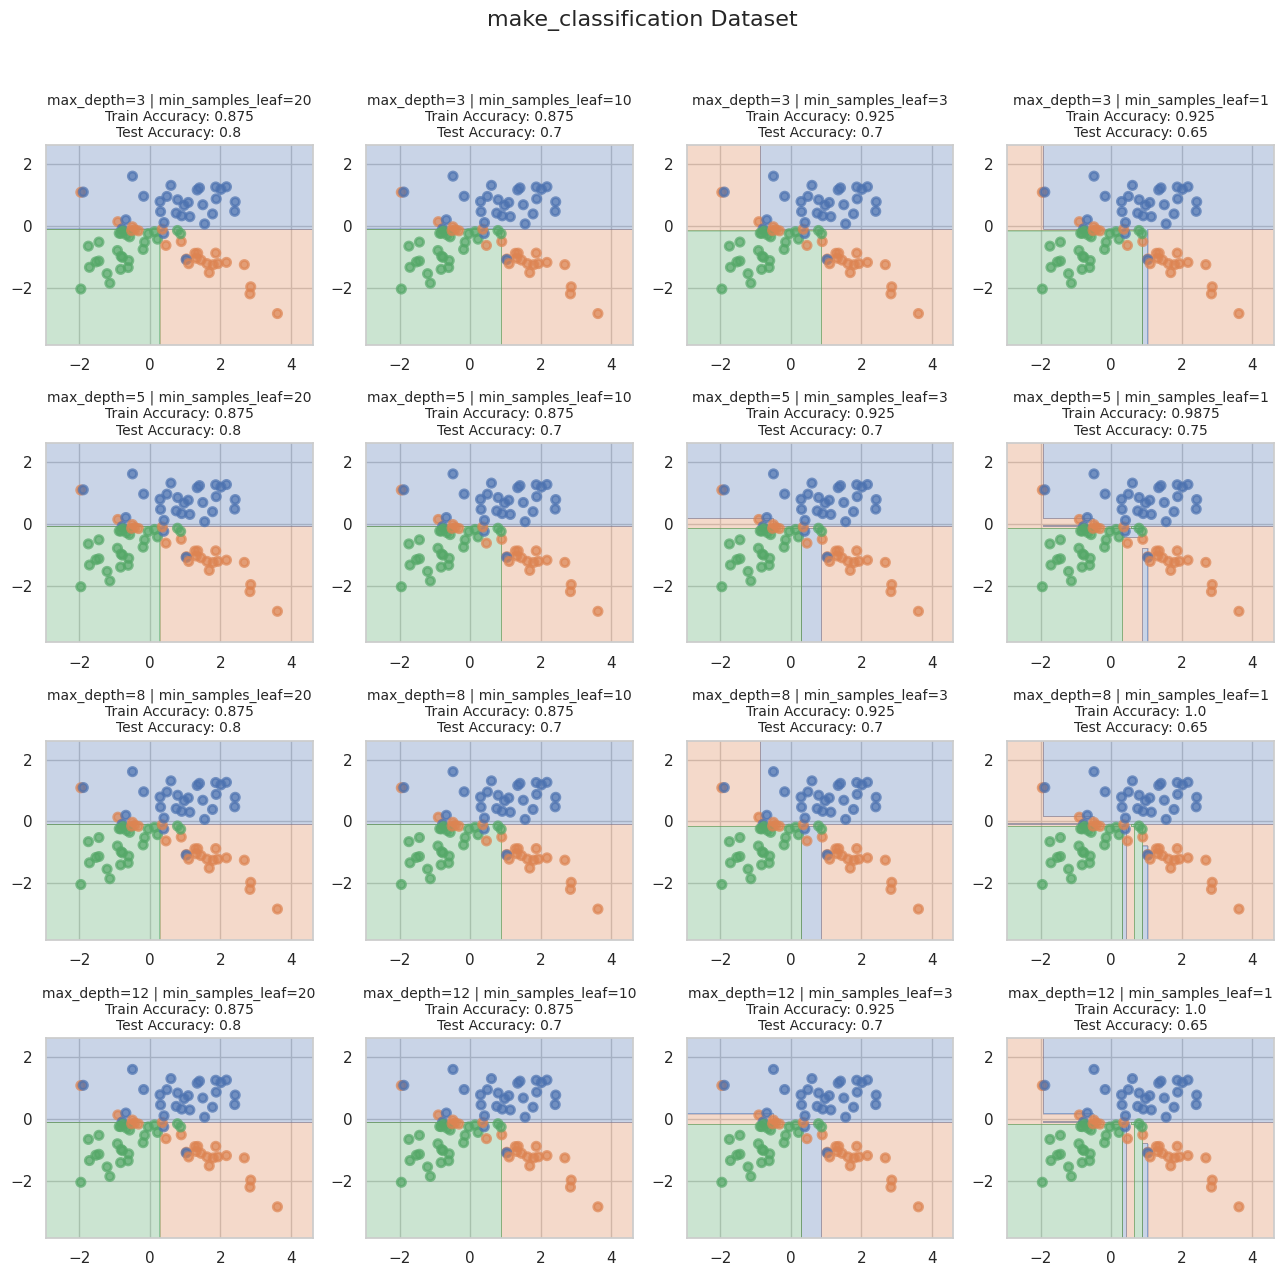

In [16]:
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
plot_grid_parameters(X_train, X_test, y_train, y_test, 'make_classification')

__Ответ:__ Видно, что при увеличении глубины дерева и уменьшении минимального числа элементов в листьях разделяющая поверхность становится сложнее, что приводит к переобучению (высокая точность на обучающих данных, но снижение точности на тесте). На более простых датасетах (make_moons и make_classification) обобщающая способность сохраняется лучше, чем на более сложных (make_circles), где модель склонна к переобучению

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Username: e.smeshkova

Ссылка на посылку: https://contest.yandex.ru/contest/72492/run-report/129511972/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [17]:
df = pd.read_csv('students.csv')
df.head(5)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [18]:
from hw5code import find_best_split

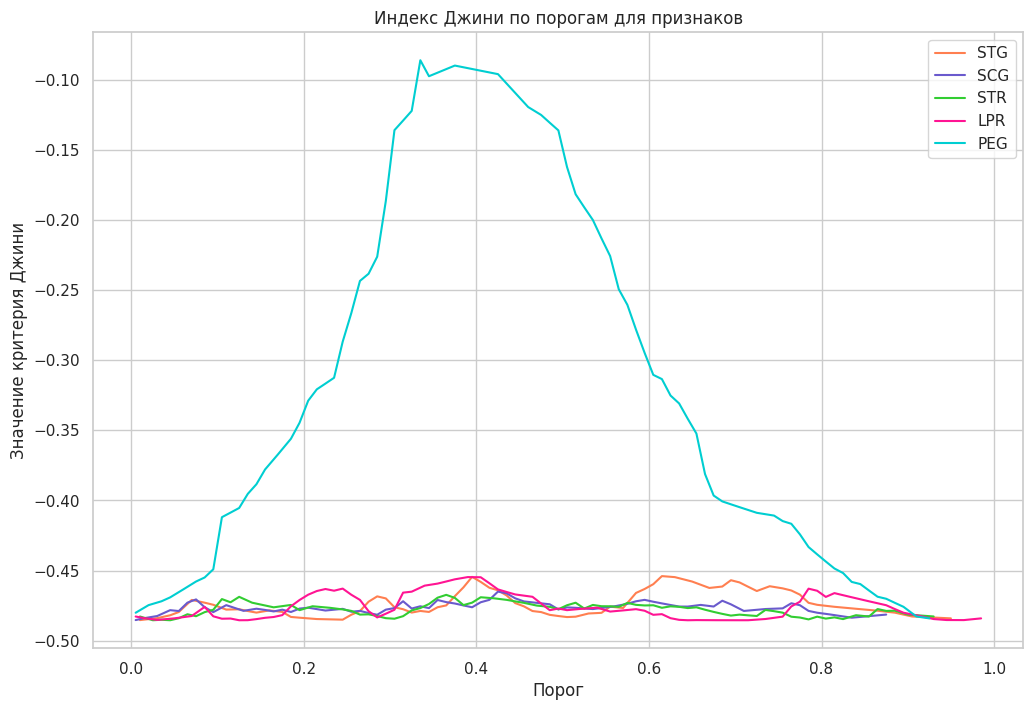

In [19]:
plt.figure(figsize=(12, 8))
colors = ['#FF7F50', '#6A5ACD', '#32CD32', '#FF1493', '#00CED1']
for idx, feature in enumerate(df.columns[:-1]):
    thresholds, gini_values, best_threshold, best_gini = find_best_split(df[feature].to_numpy(), df['UNS'].to_numpy())
    plt.plot(thresholds, gini_values, label=feature, color=colors[idx])
plt.title('Индекс Джини по порогам для признаков')
plt.legend()
plt.xlabel('Порог')
plt.ylabel('Значение критерия Джини')
plt.show()

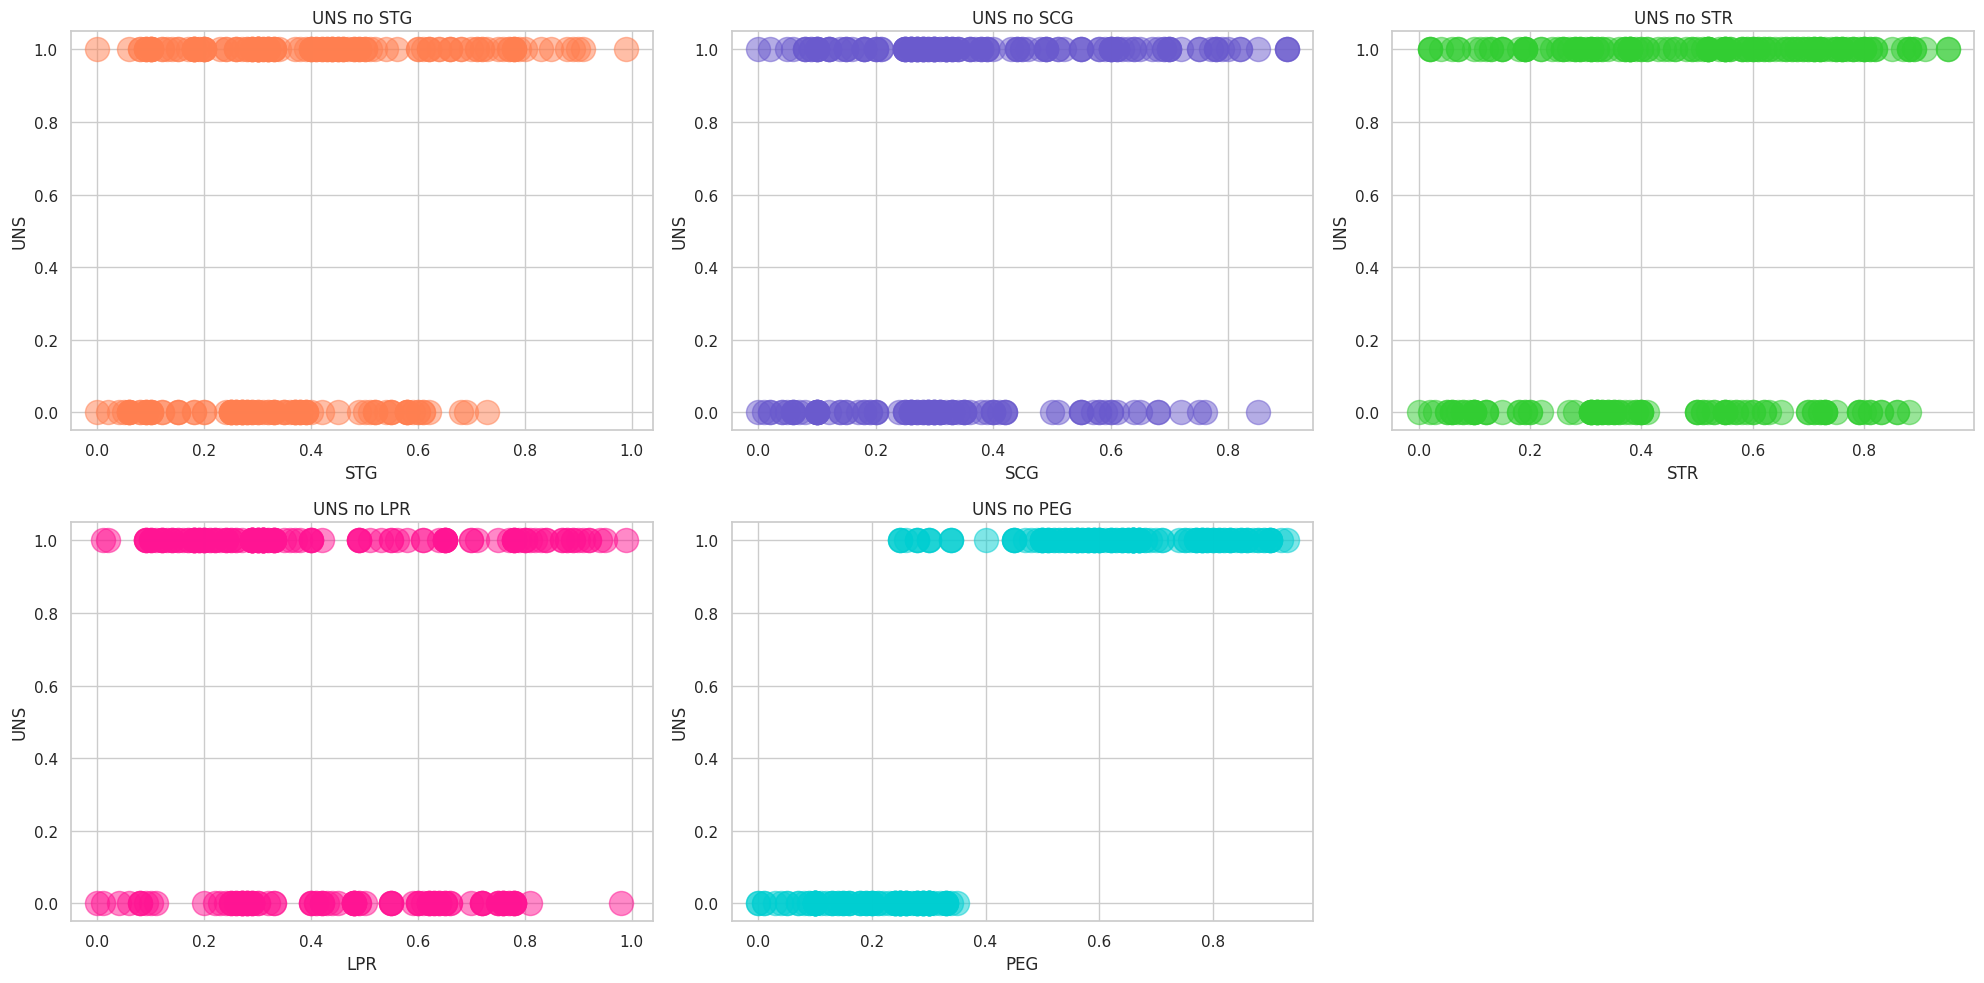

In [20]:
def plot_uns_by_feature(data, feature, target, axis, color_code):
    axis.scatter(data[feature].to_numpy(), target.to_numpy(), s=300, alpha=0.5, c=color_code, label=feature)
    axis.set_title(f'UNS по {feature}')
    axis.set_xlabel(feature)
    axis.set_ylabel('UNS')

figure, axes = plt.subplots(2, 3, figsize=(20, 10))
for index, feature in enumerate(df.columns[:-1]):
    plot_uns_by_feature(df, feature, df['UNS'], axes[index//3, index%3], colors[index])
figure.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Из кривых значений критерия Джини видно, что для признака PEG наблюдается значительное снижение значения критерия на определенном пороге, что делает его наилучшим для деления выборки на два поддерева. Это согласуется с визуальной оценкой scatter-графиков, где для PEG классы разделяются четко. Кривые для "хороших" признаков, таких как PEG, показывают резкое изменение критерия Джини, что указывает на эффективное разделение классов. В то время как для признаков, таких как LPR, STG, SCG и STR, кривые Джини плоские, что свидетельствует о трудности разделения классов и неэффективности деления

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

Username: e.smeshkova

Ссылка на посылку: https://contest.yandex.ru/contest/72492/run-report/129516934/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [2]:
from sklearn.preprocessing import LabelEncoder
from hw5code import DecisionTree

In [93]:
df = pd.read_csv("agaricus-lepiota.data", header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [94]:
from sklearn.preprocessing import LabelEncoder

df = df.apply(LabelEncoder().fit_transform)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [95]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=0), df[0], test_size=0.5, random_state=42)

In [96]:
feature_types = ['categorical'] * len(X_train)
tree = DecisionTree(feature_types)
tree.fit(X_train.to_numpy(), y_train.to_numpy())
train_accuracy = accuracy_score(y_train, tree.predict(X_train.to_numpy()))
test_accuracy = accuracy_score(y_test, tree.predict(X_test.to_numpy()))
print(f'Accuracy on training data: {train_accuracy}')
print(f'Accuracy on testing data: {test_accuracy}')

Accuracy on training data: 1.0
Accuracy on testing data: 1.0


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (https://github.com/esokolov/ml-course-hse/blob/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv).

In [5]:
df = pd.read_csv("tic-tac-toe-endgame.csv")
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [6]:
df = df.apply(LabelEncoder().fit_transform)
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='V10'), df['V10'], test_size=0.2, random_state=42)

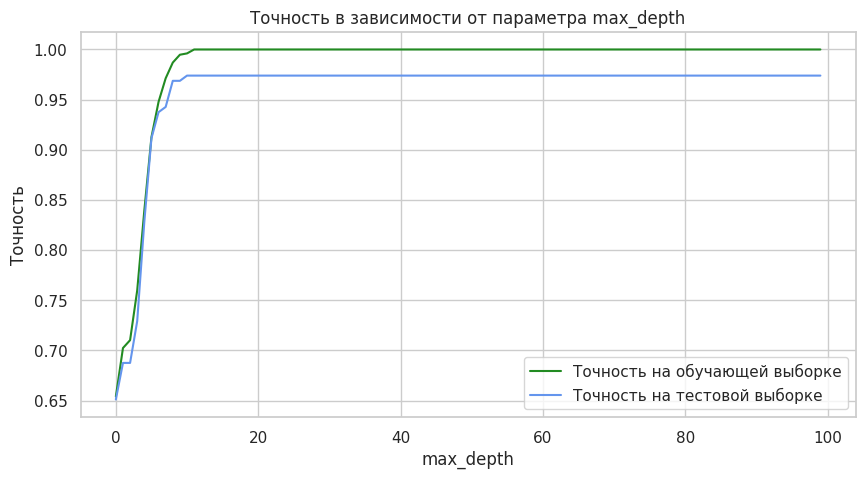

In [10]:
feature_types = ['categorical'] * len(X_train)
train_accuracy = []
test_accuracy = []

for max_depth in range(100):
    tree_model = DecisionTree(feature_types, max_depth=max_depth)
    tree_model.fit(X_train.to_numpy(), y_train.to_numpy())
    train_accuracy.append(accuracy_score(y_train, tree_model.predict(X_train.to_numpy())))
    test_accuracy.append(accuracy_score(y_test, tree_model.predict(X_test.to_numpy())))

plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Точность на обучающей выборке', color='forestgreen')
plt.plot(test_accuracy, label='Точность на тестовой выборке', color='CornflowerBlue')
plt.title('Точность в зависимости от параметра max_depth')
plt.xlabel('max_depth')
plt.ylabel('Точность')
plt.legend()
plt.show()

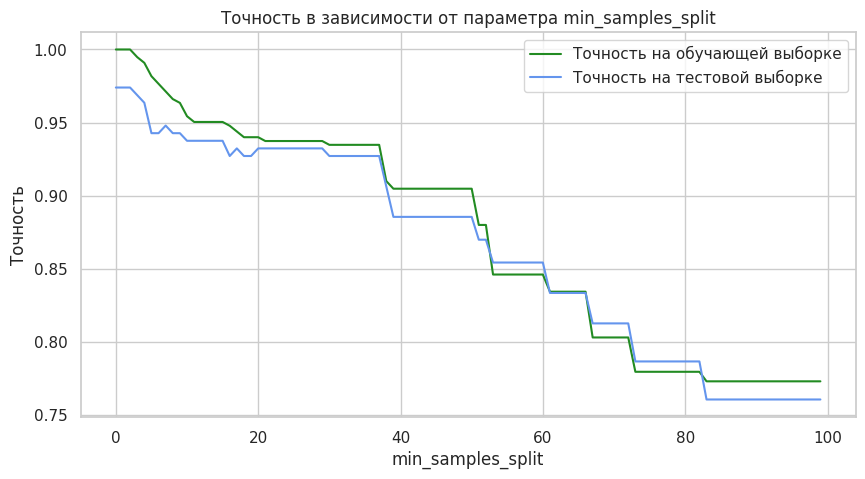

In [11]:
feature_types = ['categorical'] * len(X_train)
train_accuracy = []
test_accuracy = []

for min_samples_split in range(100):
    tree_model = DecisionTree(feature_types, min_samples_split=min_samples_split)
    tree_model.fit(X_train.to_numpy(), y_train.to_numpy())
    train_accuracy.append(accuracy_score(y_train, tree_model.predict(X_train.to_numpy())))
    test_accuracy.append(accuracy_score(y_test, tree_model.predict(X_test.to_numpy())))

plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Точность на обучающей выборке', color='forestgreen')
plt.plot(test_accuracy, label='Точность на тестовой выборке', color='CornflowerBlue')
plt.title('Точность в зависимости от параметра min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Точность')
plt.legend()
plt.show()

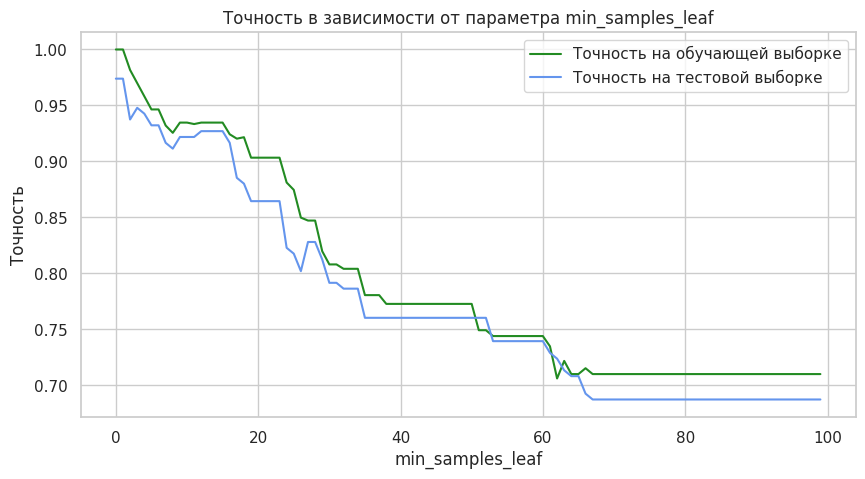

In [12]:
feature_types = ['categorical'] * len(X_train)
train_accuracy = []
test_accuracy = []

for min_samples_leaf in range(100):
    tree_model = DecisionTree(feature_types, min_samples_leaf=min_samples_leaf)
    tree_model.fit(X_train.to_numpy(), y_train.to_numpy())
    train_accuracy.append(accuracy_score(y_train, tree_model.predict(X_train.to_numpy())))
    test_accuracy.append(accuracy_score(y_test, tree_model.predict(X_test.to_numpy())))

plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Точность на обучающей выборке', color='forestgreen')
plt.plot(test_accuracy, label='Точность на тестовой выборке', color='CornflowerBlue')
plt.title('Точность в зависимости от параметра min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Точность')
plt.legend()
plt.show()

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Перебираете все пороги
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

class LinearRegressionTree:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None

    def _fit_node(self, X, y, depth):
        if len(y) <= self.min_samples_leaf or depth == self.max_depth:
            model = LinearRegression()
            model.fit(X, y)
            return {"type": "leaf", "model": model}

        best_feature, best_threshold, best_loss, best_splits = None, None, float("inf"), None

        for feature in range(X.shape[1]):
            thresholds = np.quantile(X[:, feature], np.linspace(0.1, 0.9, 10))
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                if sum(left_mask) < self.min_samples_leaf or sum(right_mask) < self.min_samples_leaf:
                    continue

                left_model = LinearRegression().fit(X[left_mask], y[left_mask])
                right_model = LinearRegression().fit(X[right_mask], y[right_mask])

                left_loss = np.mean((y[left_mask] - left_model.predict(X[left_mask])) ** 2)
                right_loss = np.mean((y[right_mask] - right_model.predict(X[right_mask])) ** 2)

                weighted_loss = (len(y[left_mask]) / len(y)) * left_loss + (len(y[right_mask]) / len(y)) * right_loss

                if weighted_loss < best_loss:
                    best_feature = feature
                    best_threshold = threshold
                    best_loss = weighted_loss
                    best_splits = (left_mask, right_mask)

        if best_splits is None:
            model = LinearRegression()
            model.fit(X, y)
            return {"type": "leaf", "model": model}

        left_mask, right_mask = best_splits
        left_child = self._fit_node(X[left_mask], y[left_mask], depth + 1)
        right_child = self._fit_node(X[right_mask], y[right_mask], depth + 1)

        return {
            "type": "node",
            "feature": best_feature,
            "threshold": best_threshold,
            "left": left_child,
            "right": right_child,
        }

    def fit(self, X, y):
        self.tree = self._fit_node(X, y, depth=0)

    def _predict_node(self, x, node):
        if node["type"] == "leaf":
            return node["model"].predict(x.reshape(1, -1))[0]
        if x[node["feature"]] <= node["threshold"]:
            return self._predict_node(x, node["left"])
        return self._predict_node(x, node["right"])

    def predict(self, X):
        return np.array([self._predict_node(x, self.tree) for x in X])

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [6]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X, y = data.data, data.target
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Стандартное дерево из sklearn:

In [7]:
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_tree = {
    'max_depth': range(10, 20),
    'min_samples_split': range(2, 21, 2),
    'min_samples_leaf': range(1, 21, 2)
}

best_mse_tree = float('inf')
best_params_tree = None

for max_depth in param_grid_tree['max_depth']:
    for min_samples_split in param_grid_tree['min_samples_split']:
        for min_samples_leaf in param_grid_tree['min_samples_leaf']:
            reg_tree = DecisionTreeRegressor(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf
            )
            reg_tree.fit(X_train, y_train)
            preds_tree = reg_tree.predict(X_test)
            mse_tree = mean_squared_error(y_test, preds_tree)
            if mse_tree < best_mse_tree:
                best_mse_tree = mse_tree
                best_params_tree = (max_depth, min_samples_split, min_samples_leaf)

results_tree = {"MSE": best_mse_tree, "Best Params": best_params_tree}
results_tree

{'MSE': 0.3557371246258343, 'Best Params': (17, 18, 11)}

Мое дерево:

In [8]:
param_grid_tree = {
    'max_depth': range(15, 19, 3),
    'min_samples_split': range(3, 8, 3),
    'min_samples_leaf': range(8, 13, 3)
}

best_mse_tree = float('inf')
best_params_tree = None

for max_depth in param_grid_tree['max_depth']:
    for min_samples_split in param_grid_tree['min_samples_split']:
        for min_samples_leaf in param_grid_tree['min_samples_leaf']:
            reg_tree = LinearRegressionTree(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf
            )
            reg_tree.fit(X_train, y_train)
            preds_tree = reg_tree.predict(X_test)
            mse_tree = mean_squared_error(y_test, preds_tree)
            if mse_tree < best_mse_tree:
                best_mse_tree = mse_tree
                best_params_tree = (max_depth, min_samples_split, min_samples_leaf)

results_tree = {"MSE": best_mse_tree, "Best Params": best_params_tree}
results_tree

{'MSE': 2.531808003055171, 'Best Params': (15, 3, 11)}

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

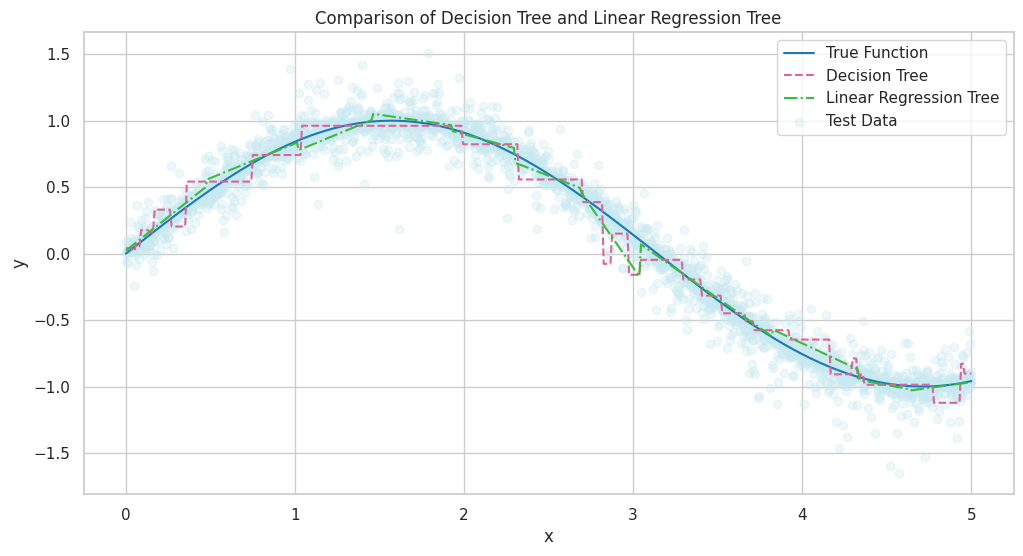

In [75]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

reg_tree = DecisionTreeRegressor(max_depth=5)
reg_tree.fit(x_train, y_train)

lin_reg_tree = LinearRegressionTree(max_depth=5, min_samples_leaf=10)
lin_reg_tree.fit(x_train, y_train)

x_plot = np.linspace(0, 5, 500).reshape(-1, 1)
y_true = np.sin(x_plot.flatten())
y_pred_reg_tree = reg_tree.predict(x_plot)
y_pred_lin_reg_tree = lin_reg_tree.predict(x_plot)

plt.figure(figsize=(12, 6))
plt.plot(x_plot, y_true, label="True Function", color="#1f77b4")
plt.plot(x_plot, y_pred_reg_tree, label="Decision Tree", linestyle="--", color="#DE639A")
plt.plot(x_plot, y_pred_lin_reg_tree, label="Linear Regression Tree", linestyle="-.", color="#3DBA3D")
plt.scatter(x_test, y_test, label="Test Data", alpha=0.3, color="#c7e9f1")
plt.legend()
plt.title("Comparison of Decision Tree and Linear Regression Tree")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


**Ответ:**

Достоинства:

*   Более гладкая аппроксимация целевой функции
*   Лучшая обобщающая способность
*   Меньшая глубина дерева за счет использования линейных моделей


Недостатки:

*  Высокая вычислительная сложность из-за обучения многих линейных моделей
*  Чувствительность к настройке гиперпараметров
*  Меньшая интерпретируемость из-за линейных моделей в листьях

Вставьте что угодно, описывающее ваши впечатления от этого задания:

![](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExbDl0Y2RwanB5azQ3N3RuZjRsdmlwYWJhbnd2ODQwcHM0MGR4ZDg2cSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/NMRuH9Ckzty1ylr2Sl/giphy.gif)